<a href="https://colab.research.google.com/github/jmerceron/AI-Activity/blob/main/Julien_MLP_Digits_Recognition_128x64x32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import plot_model

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


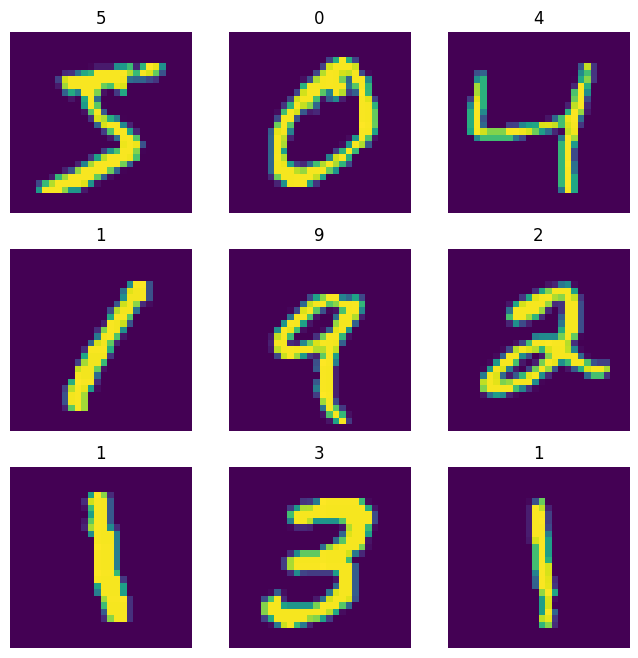

In [5]:
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.axis('off')

In [6]:
x_train = tf.keras.utils.normalize(x_train, axis =0)
x_test = tf.keras.utils.normalize(x_test, axis =0)

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


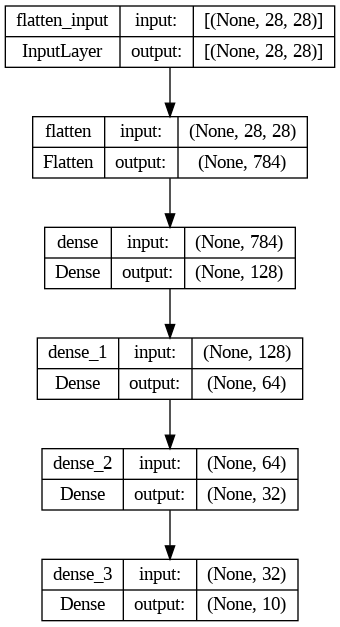

In [9]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [10]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics =['accuracy'])

In [11]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs = 15)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 11s 5ms/step - loss: 0.5599 - accuracy: 0.8295 - val_loss: 0.4816 - val_accuracy: 0.8927
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2680 - accuracy: 0.9196 - val_loss: 0.3517 - val_accuracy: 0.9227
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1962 - accuracy: 0.9404 - val_loss: 0.2678 - val_accuracy: 0.9421
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1512 - accuracy: 0.9548 - val_loss: 0.2557 - val_accuracy: 0.9456
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1244 - accuracy: 0.9632 - val_loss: 0.2055 - val_accuracy: 0.9583
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1046 - accuracy: 0.9683 - val_loss: 0.2133 - val_accuracy: 0.9568
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0878 - accuracy: 0.9729 - val_loss: 0.2209 - val_accuracy: 0.9575

In [12]:
{layer.name: layer.get_weights() for layer in model.layers}

{'flatten': [],
 'dense': [array([[-0.06592654,  0.04074224, -0.05315985, ...,  0.02438848,
           0.05775695,  0.02308185],
         [ 0.05961669,  0.01101388,  0.00697708, ...,  0.02767555,
          -0.0364953 , -0.02418983],
         [ 0.06003071,  0.00518056, -0.07527402, ..., -0.03776128,
          -0.06572257, -0.00571021],
         ...,
         [-0.03394078, -0.0606411 ,  0.00136901, ...,  0.04795616,
          -0.05914774, -0.02391958],
         [ 0.01358866,  0.06621099,  0.05034674, ...,  0.00669714,
           0.03243068, -0.0596912 ],
         [ 0.02600241, -0.07141006,  0.07120457, ..., -0.01788738,
          -0.03352116, -0.00718947]], dtype=float32),
  array([ 0.03279711,  0.00926101,  0.02662341,  0.01075901,  0.03441141,
         -0.00186372,  0.02320522,  0.00396336,  0.00798754,  0.0279052 ,
          0.00945597, -0.00192012, -0.00751601,  0.07481964,  0.00331622,
          0.00698994, -0.04892028,  0.02477162, -0.01635127,  0.00595123,
         -0.02457534, -0

In [13]:
weights1, biases1 = model.layers[1].get_weights()
print(weights1)

[[-0.06592654  0.04074224 -0.05315985 ...  0.02438848  0.05775695
   0.02308185]
 [ 0.05961669  0.01101388  0.00697708 ...  0.02767555 -0.0364953
  -0.02418983]
 [ 0.06003071  0.00518056 -0.07527402 ... -0.03776128 -0.06572257
  -0.00571021]
 ...
 [-0.03394078 -0.0606411   0.00136901 ...  0.04795616 -0.05914774
  -0.02391958]
 [ 0.01358866  0.06621099  0.05034674 ...  0.00669714  0.03243068
  -0.0596912 ]
 [ 0.02600241 -0.07141006  0.07120457 ... -0.01788738 -0.03352116
  -0.00718947]]


In [14]:
# cannot easily visualize filters lower down
from matplotlib import pyplot
# normalize weights values to 0-1 so we can visualize them
f_min, f_max = weights1.min(), weights1.max()
weights1 = (weights1 - f_min) / (f_max - f_min)
print(weights1)

[[0.6504877  0.6796634  0.6539796  ... 0.67519045 0.6843173  0.674833  ]
 [0.684826   0.6715323  0.6704281  ... 0.6760895  0.6585377  0.6619034 ]
 [0.6849392  0.6699367  0.64793104 ... 0.65819144 0.6505435  0.666958  ]
 ...
 [0.6592364  0.6519334  0.66889423 ... 0.68163663 0.6523418  0.66197735]
 [0.6722365  0.6866296  0.6822905  ... 0.67035156 0.6773901  0.6521932 ]
 [0.6756319  0.6489878  0.6879955  ... 0.66362727 0.65935117 0.6665533 ]]


In [15]:
# Get the weights from the first Hidden layer
print(weights1.shape)
# Get the weights from the second Hidden layer
weights2, biases2 = model.layers[2].get_weights()
print(weights2.shape)
# Get the weights from the third Hidden layer
weights3, biases3 = model.layers[3].get_weights()
print(weights3.shape)

(784, 128)
(128, 64)
(64, 32)


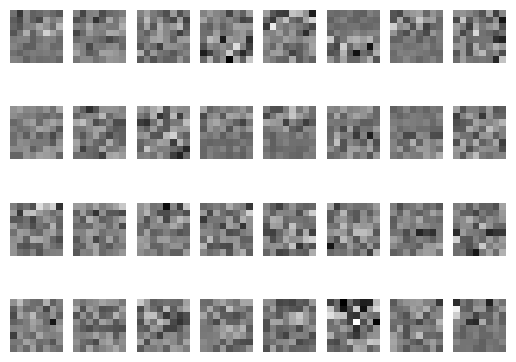

In [17]:
# normalize weights values to 0-1 so we can visualize them
f_min, f_max = weights3.min(), weights3.max()
weights3 = (weights3 - f_min) / (f_max - f_min)

# Check if the shape is compatible for reshaping
if weights3.shape != (8 * 8, 32):
    print("The shape of the weights array is not compatible for reshaping.")

# Reshape weights into  images of 8 by 8
weights3_images = weights3.reshape(-1, 8, 8)

# Plot the weights
fig, axes = plt.subplots(4, 8)
for i, ax in enumerate(axes.flat):
#    ax.matshow(weights3_images[i], cmap='viridis')
    ax.matshow(weights3_images[i], cmap=plt.cm.gray, vmin=f_min, vmax=f_max)
    ax.axis('off')

plt.show()

***... now you have to put your 10 digit images in content folder...***
these images have to be labelled digit_x.png, in an 28x28 resolution

In [18]:
import cv2

In [19]:
image = cv2.imread('digit_3.png')[:,:,0]
image = np.invert(np.array([image]))

1/1 [==============================] - 0s 110ms/step
3


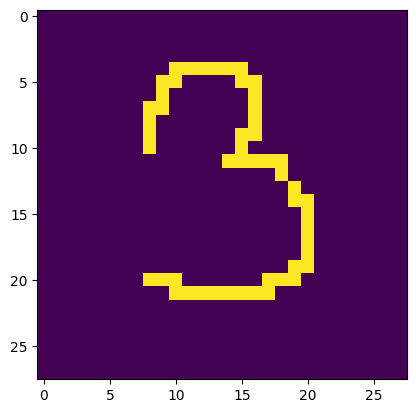

In [20]:
output = model.predict(image)
plt.imshow(image[0])
print(np.argmax(output))

In [21]:
model.save('/content/hand_written_Digit_recog_model.keras')

In [22]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [23]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.396s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


In [24]:
!streamlit run /content/julien_web_app.py &> /content/logs.txt &

In [25]:
!npx localtunnel --port 8501

npx: installed 22 in 2.19s
your url is: https://flat-pots-try.loca.lt
^C
